# üß™ Object Detection Demo ‚Äì Haar & HOG

This notebook demonstrates classical object detection using OpenCV:
- Face detection with Haar cascades
- Pedestrian detection with HOG + SVM

Images are loaded from the shared `images/` directory.


## Environment Setup

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


## Haar Face Detection

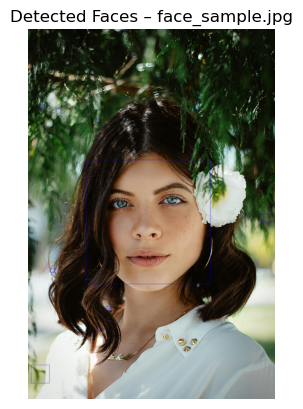

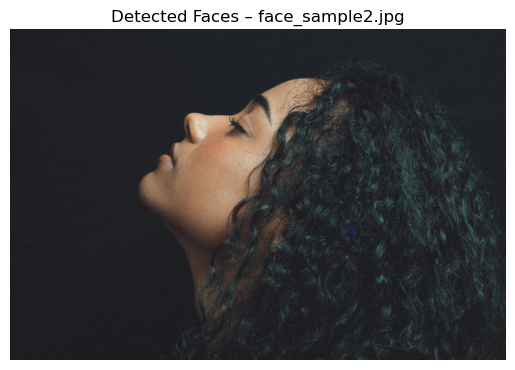

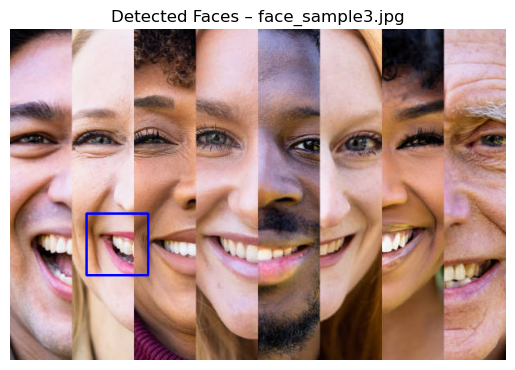

In [49]:


# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directory of face images
face_dir = "../../images/faces"

# Loop through all images in the folder
for fname in os.listdir(face_dir):
    path = os.path.join(face_dir, fname)
    img_face = cv2.imread(path)

    if img_face is None:
        print(f"‚ùå Could not load {fname}")
        continue

    gray_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_face, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img_face, (x, y), (x+w, y+h), (255, 0, 0), 2)

    show_image(img_face, f"Detected Faces ‚Äì {fname}")


## Detection Stats Summary

In [56]:
face_counts = {}
for fname in os.listdir(face_dir):
    path = os.path.join(face_dir, fname)
    img = cv2.imread(path)
    if img is None:
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    face_counts[fname] = len(faces)

print("Face Detection Summary:")
for fname, count in face_counts.items():
    print(f"{fname}: {count} face(s)")


Face Detection Summary:
face_sample.jpg: 11 face(s)
face_sample2.jpg: 1 face(s)
face_sample3.jpg: 1 face(s)


## HOG Pedestrian Detection

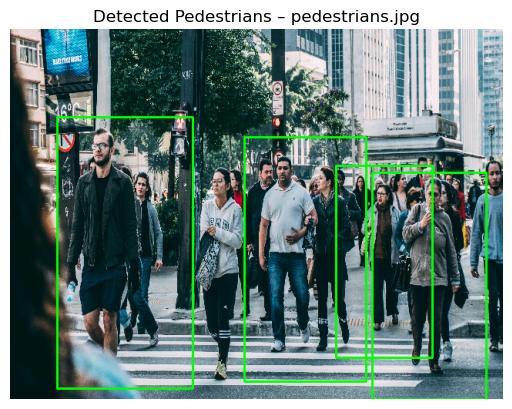

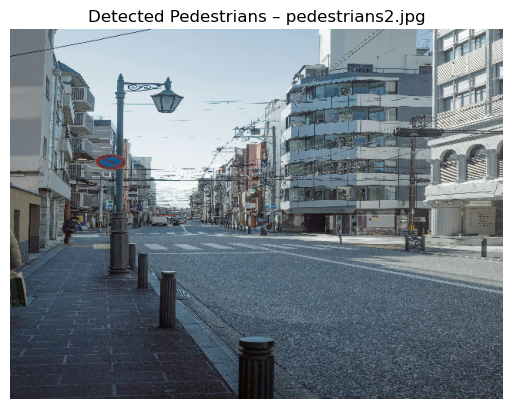

In [51]:

# Initialize HOG + SVM
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Directory of pedestrian images
ped_dir = "../../images/pedestrians"

# Loop through all images in the folder
for fname in os.listdir(ped_dir):
    path = os.path.join(ped_dir, fname)
    img_ped = cv2.imread(path)

    if img_ped is None:
        print(f"‚ùå Could not load {fname}")
        continue

    img_ped = cv2.resize(img_ped, (640, 480))

    # Detect pedestrians
    (rects, weights) = hog.detectMultiScale(img_ped, winStride=(8,8), padding=(8,8), scale=1.05)

    for (x, y, w, h) in rects:
        cv2.rectangle(img_ped, (x, y), (x+w, y+h), (0, 255, 0), 2)

    show_image(img_ped, f"Detected Pedestrians ‚Äì {fname}")


## ‚úÖ Conclusion

This notebook demonstrates classical object detection using OpenCV:
- Haar cascades for face detection
- HOG + SVM for pedestrian detection

Both methods were tested on multiple static images. Results show that while these techniques are fast and interpretable, they may struggle with occlusion, lighting, and scale variation. Future work could include:
- Real-time webcam detection
- Deep learning-based detectors (e.g., YOLO, SSD)
- Evaluation metrics like precision and recall
